Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Best Random Forest Model Parameters: {'max_depth': 10, 'n_estimators': 500}
Train MAE: 1.5312707910325427e-05, Test MAE: 4.465297733535241e-05
Train MSE: 2.2645952456093708e-09, Test MSE: 1.4472659781016255e-08
Train RRMSE: 0.0090, Test RRMSE: 0.0394
Train R²: 0.9907, Test R²: 0.8940
Train AAPRE: 42.9955%, Test AAPRE: 59.6275%



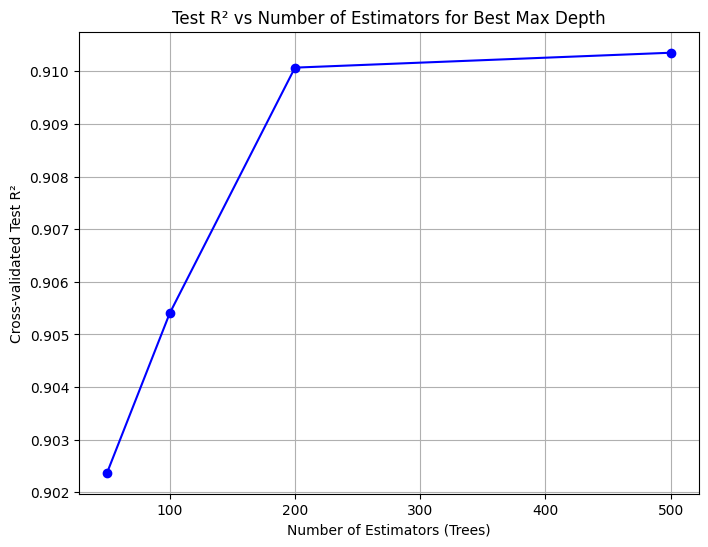

In [ ]:
# Import necessary libraries
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Load data
df = pd.read_csv('/content/drive/My Drive/drugdata.csv')
df = df.iloc[:, :6].dropna()
X = df.iloc[:, :5]
y = df.iloc[:, 5]
d = 1000000

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rrmse = rmse / (np.max(y_true) - np.min(y_true))
    r2 = r2_score(y_true, y_pred)
    aapre = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, mse, rrmse, r2, aapre

# Define the Random Forest model
# Parameters to tune: n_estimators (number of trees), max_depth (maximum depth of each tree)
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, 20, 30, 50, None]
}

rf_model = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled, validation_fraction=0.15)

# Best model after hyperparameter tuning
best_rf_model = grid_search.best_estimator_

# Make predictions
y_train_pred_scaled = best_rf_model.predict(X_train_scaled)
y_test_pred_scaled = best_rf_model.predict(X_test_scaled)

# Denormalize the predictions
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

# Calculate metrics for training and testing sets
train_mae, train_mse, train_rrmse, train_r2, train_aapre = calculate_metrics(y_train / d, y_train_pred / d)
test_mae, test_mse, test_rrmse, test_r2, test_aapre = calculate_metrics(y_test / d, y_test_pred / d)

# Print results
print(f"Best Random Forest Model Parameters: {grid_search.best_params_}")
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train RRMSE: {train_rrmse:.4f}, Test RRMSE: {test_rrmse:.4f}")
print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
print(f"Train AAPRE: {train_aapre:.4f}%, Test AAPRE: {test_aapre:.4f}%\n")

# Extract the mean test R² scores and corresponding parameters
mean_test_r2 = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']

# Filter out R² scores corresponding to the best max_depth
best_max_depth = grid_search.best_params_['max_depth']
filtered_r2 = [mean_test_r2[i] for i in range(len(params)) if params[i]['max_depth'] == best_max_depth]
filtered_n_estimators = [params[i]['n_estimators'] for i in range(len(params)) if params[i]['max_depth'] == best_max_depth]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(filtered_n_estimators, filtered_r2, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Cross-validated Test R²')
plt.title('Test R² vs Number of Estimators for Best Max Depth')
plt.grid(True)
plt.show()


Mounted at /content/drive
Best Random Forest Model Parameters: {'max_depth': 10, 'n_estimators': 500}
Train MAE: 1.5312707910325427e-05, Test MAE: 4.465297733535241e-05
Train MSE: 2.2645952456093708e-09, Test MSE: 1.4472659781016255e-08
Train RMSE: 0.0000, Test RMSE: 0.0001
Train RRMSE: 0.0090, Test RRMSE: 0.0394
Train R²: 0.9907, Test R²: 0.8940
Train AAPRE: 42.9955%, Test AAPRE: 59.6275%
Train RAE: 0.0641, Test RAE: 0.2239



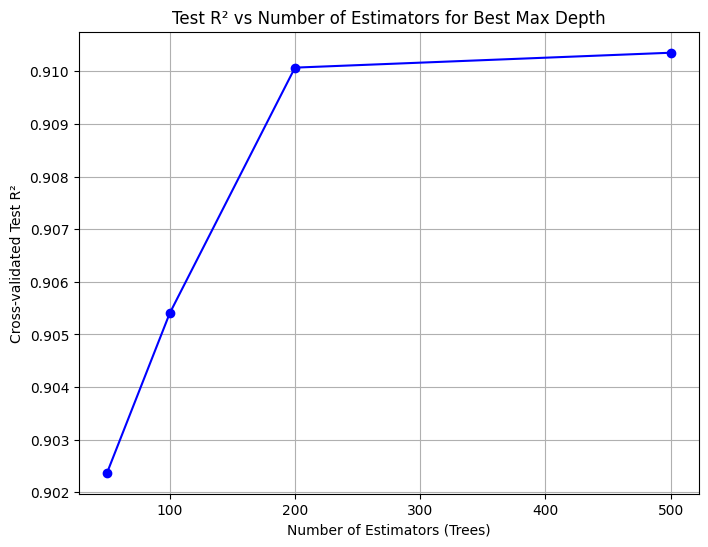

In [ ]:
# Import necessary libraries
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Load data
df = pd.read_csv('/content/drive/My Drive/drugdata.csv')
df = df.iloc[:, :6].dropna()
X = df.iloc[:, :5]
y = df.iloc[:, 5]
d = 1000000

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Function to calculate evaluation metrics including RAE
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rrmse = rmse / (np.max(y_true) - np.min(y_true))
    r2 = r2_score(y_true, y_pred)
    aapre = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # RAE calculation
    rae = np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true - np.mean(y_true)))

    return mae, mse, rmse, rrmse, r2, aapre, rae

# Define the Random Forest model
# Parameters to tune: n_estimators (number of trees), max_depth (maximum depth of each tree)
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, 20, 30, 50, None]
}

rf_model = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled, validation_fraction=0.15)

# Best model after hyperparameter tuning
best_rf_model = grid_search.best_estimator_

# Make predictions
y_train_pred_scaled = best_rf_model.predict(X_train_scaled)
y_test_pred_scaled = best_rf_model.predict(X_test_scaled)

# Denormalize the predictions
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

# Calculate metrics for training and testing sets
train_mae, train_mse, train_rmse, train_rrmse, train_r2, train_aapre, train_rae = calculate_metrics(y_train / d, y_train_pred / d)
test_mae, test_mse, test_rmse, test_rrmse, test_r2, test_aapre, test_rae = calculate_metrics(y_test / d, y_test_pred / d)

# Print results
print(f"Best Random Forest Model Parameters: {grid_search.best_params_}")
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
print(f"Train RRMSE: {train_rrmse:.4f}, Test RRMSE: {test_rrmse:.4f}")
print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
print(f"Train AAPRE: {train_aapre:.4f}%, Test AAPRE: {test_aapre:.4f}%")
print(f"Train RAE: {train_rae:.4f}, Test RAE: {test_rae:.4f}\n")

# Extract the mean test R² scores and corresponding parameters
mean_test_r2 = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']

# Filter out R² scores corresponding to the best max_depth
best_max_depth = grid_search.best_params_['max_depth']
filtered_r2 = [mean_test_r2[i] for i in range(len(params)) if params[i]['max_depth'] == best_max_depth]
filtered_n_estimators = [params[i]['n_estimators'] for i in range(len(params)) if params[i]['max_depth'] == best_max_depth]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(filtered_n_estimators, filtered_r2, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Cross-validated Test R²')
plt.title('Test R² vs Number of Estimators for Best Max Depth')
plt.grid(True)
plt.show()


In [ ]:
# Import necessary libraries
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Load data
df = pd.read_csv('/content/drive/My Drive/drugdata.csv')
df = df.iloc[:, :6].dropna()
X = df.iloc[:, :5]
y = df.iloc[:, 5]
d = 1000000

# Scale the data
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Function to calculate evaluation metrics including RAE
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rrmse = rmse / (np.max(y_true) - np.min(y_true))
    r2 = r2_score(y_true, y_pred)
    aapre = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # RAE calculation
    rae = np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true - np.mean(y_true)))

    return mae, mse, rmse, rrmse, r2, aapre, rae

# Set up 4-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Initialize the model with fixed parameters
rf_model = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)

# List to store all metrics for each fold
all_metrics = []

for fold, (train_index, test_index) in enumerate(kf.split(X_scaled), 1):
    # Split data according to the current fold
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y_scaled[train_index], y_scaled[test_index]

    # Fit the Random Forest model
    rf_model.fit(X_train_fold, y_train_fold)

    # Make predictions
    y_train_pred_scaled_fold = rf_model.predict(X_train_fold)
    y_test_pred_scaled_fold = rf_model.predict(X_test_fold)

    # Denormalize the predictions
    y_train_pred_fold = scaler_y.inverse_transform(y_train_pred_scaled_fold.reshape(-1, 1)).flatten()
    y_test_pred_fold = scaler_y.inverse_transform(y_test_pred_scaled_fold.reshape(-1, 1)).flatten()

    # Calculate metrics for training and testing sets
    train_mae, train_mse, train_rmse, train_rrmse, train_r2, train_aapre, train_rae = calculate_metrics(y_train_fold / d, y_train_pred_fold / d)
    test_mae, test_mse, test_rmse, test_rrmse, test_r2, test_aapre, test_rae = calculate_metrics(y_test_fold / d, y_test_pred_fold / d)

    # Store metrics for this fold
    all_metrics.append({
        'fold': fold,
        'train_mae': train_mae, 'train_mse': train_mse, 'train_rmse': train_rmse,
        'train_rrmse': train_rrmse, 'train_r2': train_r2, 'train_aapre': train_aapre, 'train_rae': train_rae,
        'test_mae': test_mae, 'test_mse': test_mse, 'test_rmse': test_rmse,
        'test_rrmse': test_rrmse, 'test_r2': test_r2, 'test_aapre': test_aapre, 'test_rae': test_rae
    })

# Convert the list of dictionaries to a DataFrame for easier analysis
metrics_df = pd.DataFrame(all_metrics)

# Calculate the mean of the metrics across all folds
mean_metrics = metrics_df.mean()
print("Average Metrics Across Folds:")
print(mean_metrics)

# Optionally, save the metrics to a CSV file
metrics_df.to_csv('/content/drive/My Drive/random_forest_cv_results.csv', index=False)


Mounted at /content/drive


<ipython-input-1-5ccc58e25318>:33: RuntimeWarning: divide by zero encountered in divide
  aapre = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
<ipython-input-1-5ccc58e25318>:33: RuntimeWarning: divide by zero encountered in divide
  aapre = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
<ipython-input-1-5ccc58e25318>:33: RuntimeWarning: divide by zero encountered in divide
  aapre = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


Average Metrics Across Folds:
fold           2.500000e+00
train_mae      1.775548e-04
train_mse      2.342989e-07
train_rmse     4.823493e-04
train_rrmse    5.200839e+02
train_r2      -2.933772e+07
train_aapre             inf
train_rae      4.060946e+03
test_mae       1.789620e-04
test_mse       2.107899e-07
test_rmse      4.519006e-04
test_rrmse     6.143222e+02
test_r2       -2.847786e+07
test_aapre              inf
test_rae       4.172780e+03
dtype: float64


<ipython-input-1-5ccc58e25318>:33: RuntimeWarning: divide by zero encountered in divide
  aapre = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
all_metrics

[{'fold': 1,
  'train_mae': 0.00018896834484973644,
  'train_mse': 2.7270441678184294e-07,
  'train_rmse': 0.0005222110845068715,
  'train_rrmse': 522.2110845068715,
  'train_r2': -29418631.74387149,
  'train_aapre': inf,
  'train_rae': 4010.430586748438,
  'test_mae': 0.00016158228409692062,
  'test_mse': 1.534087751692915e-07,
  'test_rmse': 0.00039167432283632213,
  'test_rrmse': 678.1043444372843,
  'test_r2': -37809171.91196216,
  'test_aapre': 869717.8377616496,
  'test_rae': 4812.0618552465885},
 {'fold': 2,
  'train_mae': 0.0001899944981883666,
  'train_mse': 2.650153964608746e-07,
  'train_rmse': 0.0005147964611969225,
  'train_rrmse': 514.7964611969226,
  'train_r2': -29586422.851158906,
  'train_aapre': inf,
  'train_rae': 4051.8005289405446,
  'test_mae': 0.00014553444396438086,
  'test_mse': 1.4142625404179955e-07,
  'test_rmse': 0.0003760668212456392,
  'test_rrmse': 553.1184746347519,
  'test_r2': -28392031.975739677,
  'test_aapre': 1161238.7873718285,
  'test_rae': 423